<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [ ]:
student_number = '403206565'
Name = 'Reza'
Last_Name = 'Ghorbani'

# Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [ ]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
     np.random.seed(42)
     X = np.random.uniform(range_start, range_end, num_samples)
     y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5
     noise = np.random.normal(0, noise_std, num_samples)
     y += noise
     return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

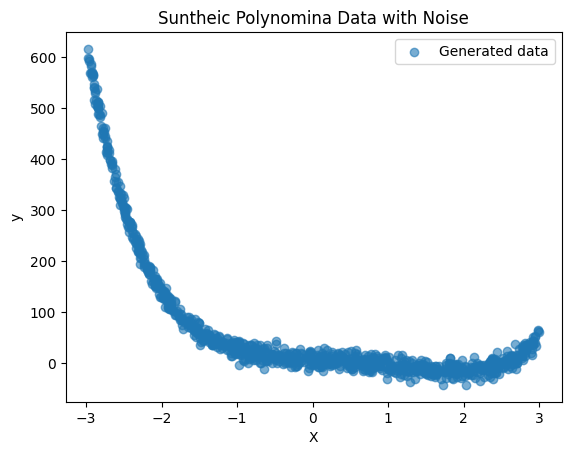

In [ ]:
X, y = generate_dataset(-3, 3)

plt.scatter(X, y,alpha =0.6, label='Generated data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Suntheic Polynomina Data with Noise')
plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, num_samples=len(x_test))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

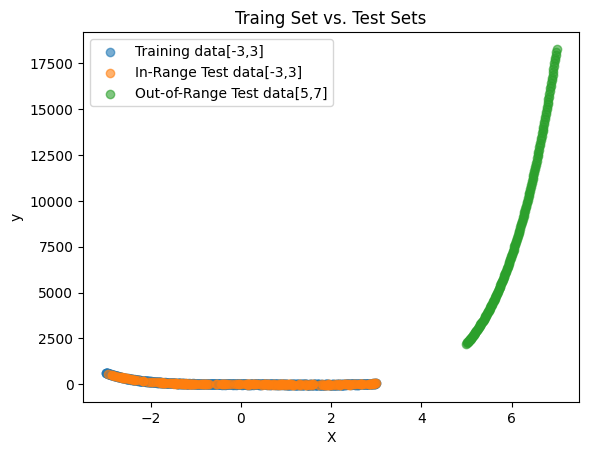

In [ ]:
plt.scatter(x_train, y_train, alpha =0.6, label='Training data[-3,3]')
plt.scatter(x_test, y_test, alpha =0.6, label='In-Range Test data[-3,3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range ,alpha =0.6, label='Out-of-Range Test data[5,7]')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Traing Set vs. Test Sets')
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [ ]:
def train_models(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X.reshape(-1, 1), y)

    return model

In [ ]:
models = {}
degree = 9

for i in range(2, degree + 1):
    models[i] = train_models(x_train, y_train, i)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [ ]:
def evaluate_models(models, X_test, y_test):
    losses = {}

    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        loss = mean_squared_error(y_test, y_pred)
        losses[degree] = loss

    return losses

In [ ]:
train_losses = evaluate_models(models, x_train, y_train)
in_range_test_losses = evaluate_models(models, x_test, y_test)
out_of_range_test_losses = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

In [ ]:
list_of_degrees = [i for i in range(2, degree + 1)]

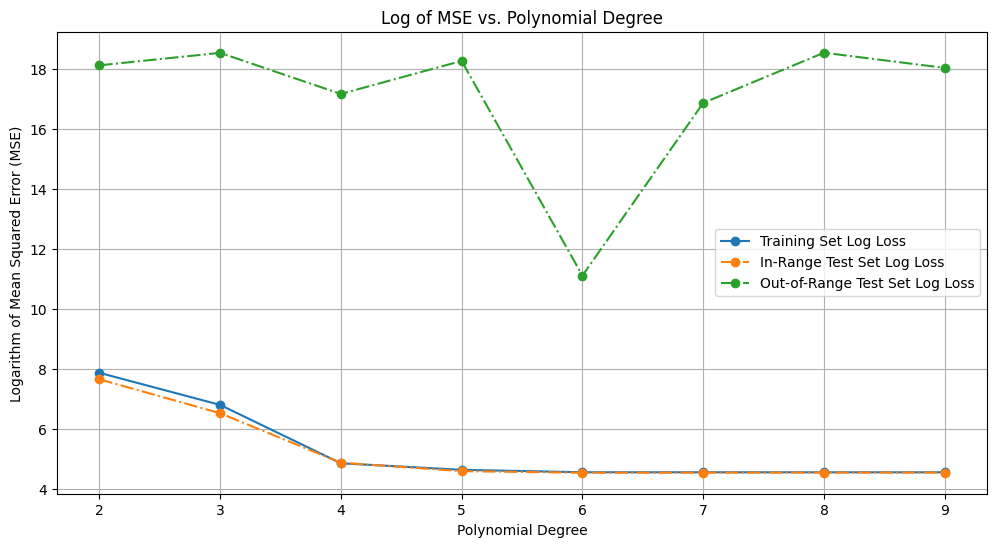

In [ ]:
train_losses_log = {}
for degree, loss in train_losses.items():
    train_losses_log[degree] = np.log(loss)

plt.figure(figsize=(12, 6))
plt.plot(list_of_degrees, [np.log(loss) for loss in train_losses.values()], marker='o', linestyle='-', label='Training Set Log Loss')
plt.plot(list_of_degrees, [np.log(loss) for loss in in_range_test_losses.values()], marker='o', linestyle='-.', label='In-Range Test Set Log Loss')
plt.plot(list_of_degrees, [np.log(loss) for loss in out_of_range_test_losses.values()], marker='o', linestyle='-.', label='Out-of-Range Test Set Log Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Log of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = {
    'degree': [i for i in range(2, degree + 1)],
    'train_loss': [np.log(loss) for loss in train_losses.values()],  # Apply log to each loss value
    'in_range_test_loss': [np.log(loss) for loss in in_range_test_losses.values()],  # Apply log to each loss value
    'out_of_range_test_loss': [np.log(loss) for loss in out_of_range_test_losses.values()]  # Apply log to each loss value
}

df = pd.DataFrame(data)
df.set_index('degree', inplace=True)
print(df)

        train_loss  in_range_test_loss  out_of_range_test_loss
degree                                                        
2         7.869086            7.654099               18.110072
3         6.800312            6.522754               18.526687
4         4.855052            4.873522               17.157846
5         4.637004            4.592991               18.257344
6         4.556760            4.540845               11.105823
7         4.555605            4.543391               16.857911
8         4.554795            4.545431               18.530614
9         4.554722            4.546364               18.024727


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** Write

##tradeoff:
simpler models (low degree) have higher bias but lower variance, while complex models (high degree) have lower bias but higher variance. The optimal model complexity balances these, minimizing in-range test loss and generalizing well to unseen data, including out-of-range data.

##Training Loss:
Decreases with increasing model complexity (polynomial degree).
##In-Range Test Loss:
Initially decreases but eventually increases as the model becomes too complex and overfits.
##Out-of-Range Test Loss:
Generally higher for complex models, showing poor generalization outside the training data range.

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:

Increasing model complexity (polynomial degree) initially reduces both training and in-range test loss, indicating better fit. However, beyond a certain point, in-range test loss starts increasing while training loss continues to decrease, signaling overfitting - the model is fitting noise in the training data and generalizing poorly to unseen data. Conversely, very low complexity can lead to underfitting, where the model is too simple to capture underlying patterns.

This understanding guides model selection: the optimal polynomial degree minimizes the in-range test loss without overfitting, balancing model complexity with generalization performance. Evaluating out-of-range test loss further helps assess extrapolation ability.

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [ ]:
file_path = "/content/InsuranceData.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

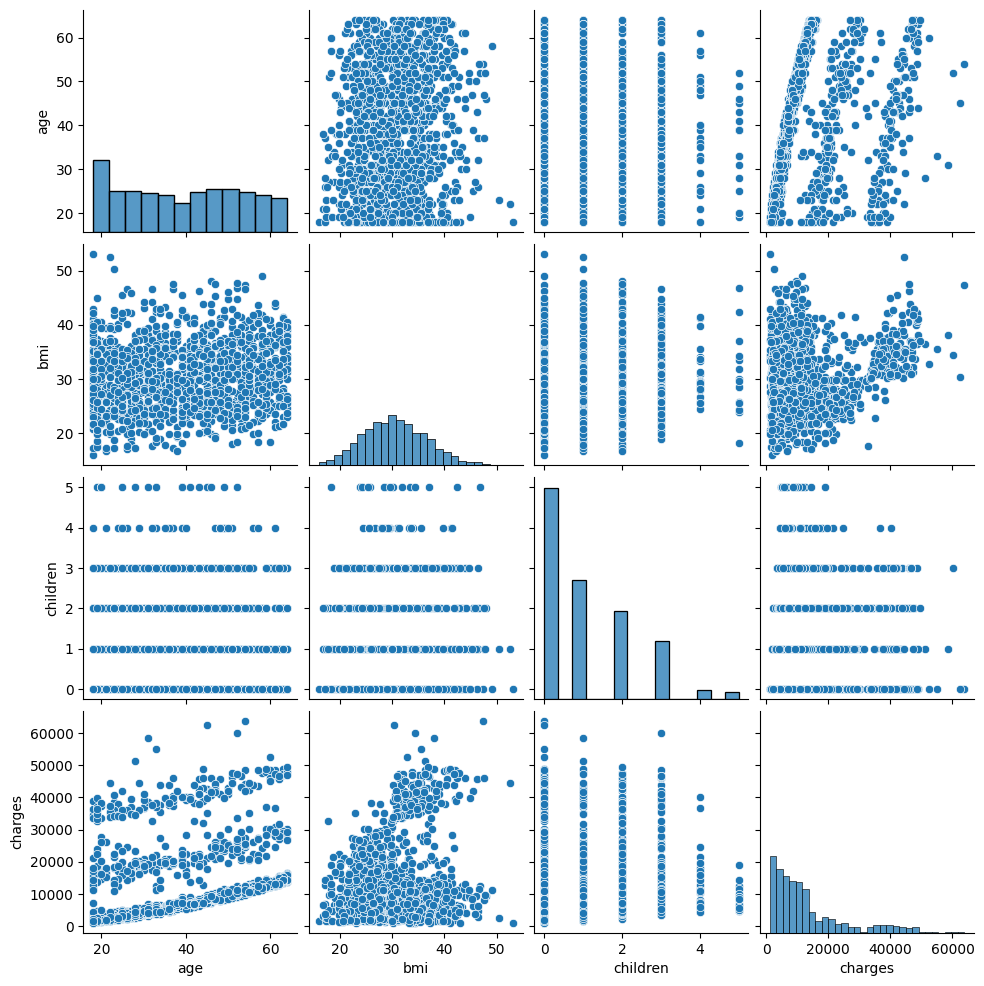

In [ ]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [ ]:
# Encoding categorical features
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df=pd.get_dummies(df, columns=['region'], drop_first=True)


# Standardization of numerical features
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,False,True,False
2,-0.797954,1,0.383307,1.580926,0,4449.46200,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,True,False,False


In [ ]:
X = df.drop(['charges','children'], axis=1)
y = df['charges']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

Fit a linear regressor to the data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

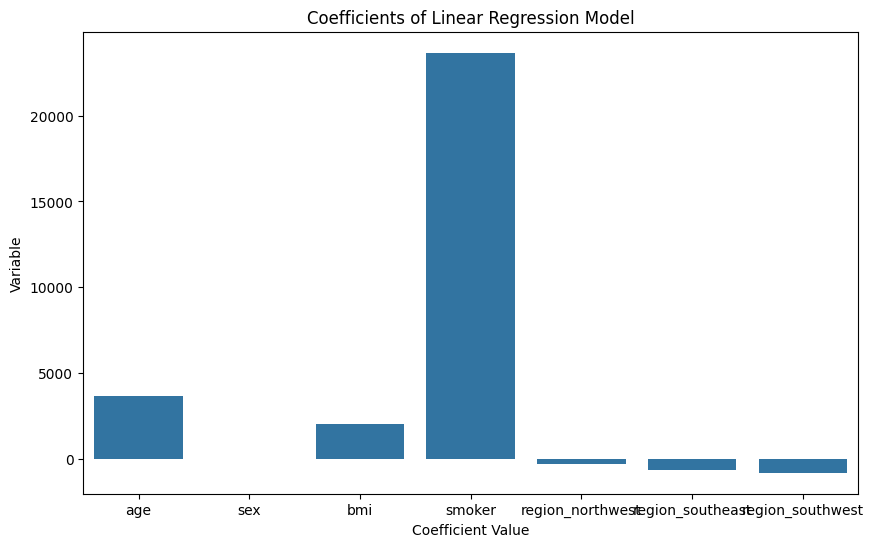

In [ ]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Coefficient', data=coefficients)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [ ]:
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [ ]:
Ridge_model = Ridge(alpha=0.1)
Ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

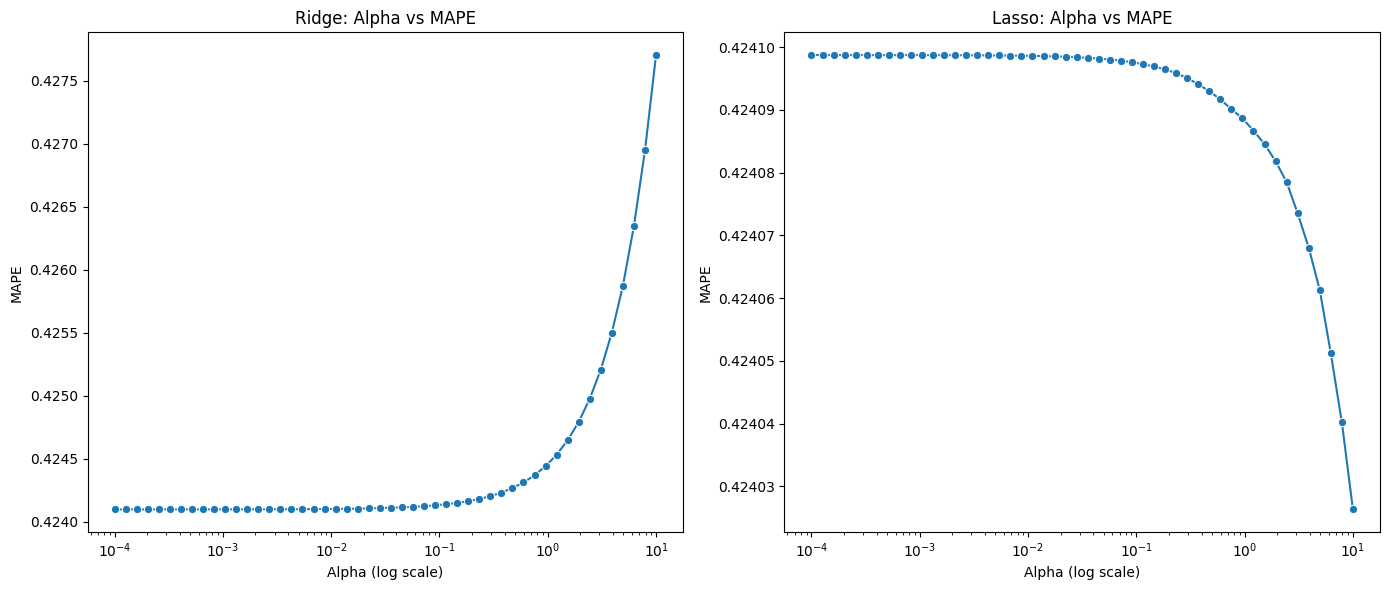

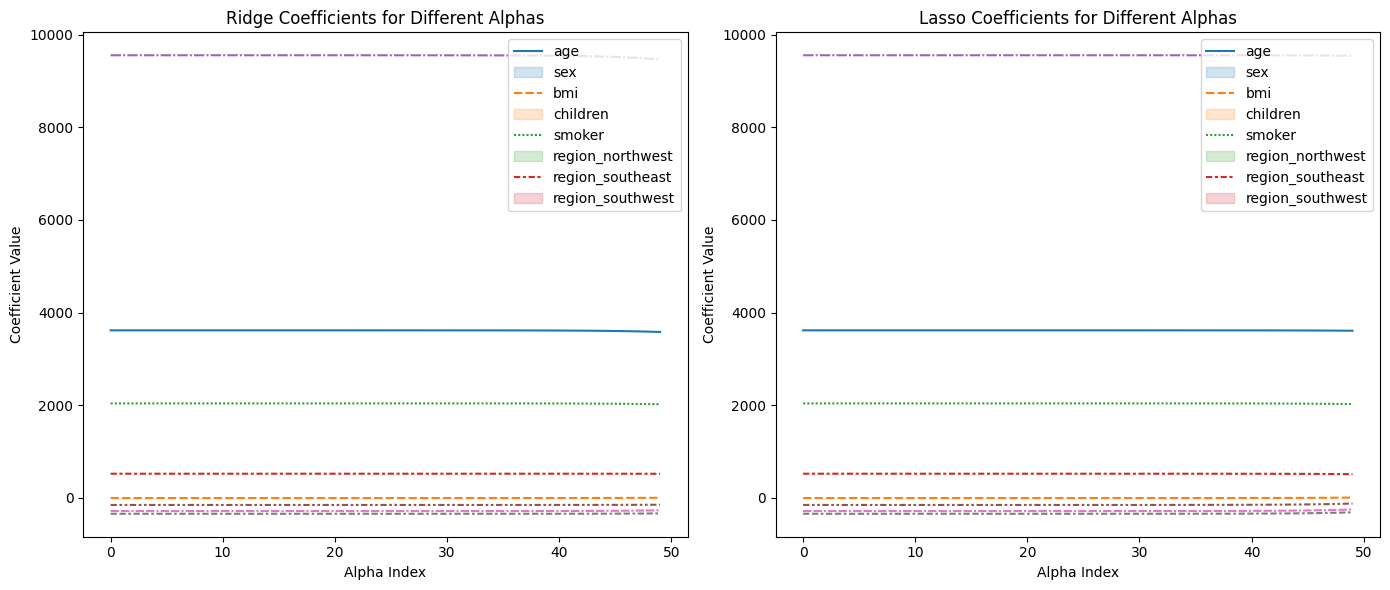

In [ ]:
# Step 1: Prepare the data
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

# Split into training and validation sets (instead of test)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define alpha values for Ridge and Lasso
alphas = np.logspace(-4, 1, 50)  # Generate 50 values from 10^-4 to 10^1

# Step 3: Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for results
ridge_results = []
lasso_results = []
ridge_coefs = []
lasso_coefs = []

# Step 4: Iterate over alphas for Ridge
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_pipe = make_pipeline(StandardScaler(), ridge_model)

    # Cross-validation using MAPE
    mape = -cross_val_score(ridge_pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()
    ridge_results.append((alpha, mape))

    # Fit and store coefficients
    ridge_pipe.fit(X_train, y_train)
    ridge_coefs.append(ridge_model.coef_)

# Step 5: Iterate over alphas for Lasso
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_pipe = make_pipeline(StandardScaler(), lasso_model)

    # Cross-validation using MAPE
    mape = -cross_val_score(lasso_pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()
    lasso_results.append((alpha, mape))

    # Fit and store coefficients
    lasso_pipe.fit(X_train, y_train)
    lasso_coefs.append(lasso_model.coef_)

# Convert results to DataFrames for easy plotting
ridge_results_df = pd.DataFrame(ridge_results, columns=['alpha', 'MAPE'])
lasso_results_df = pd.DataFrame(lasso_results, columns=['alpha', 'MAPE'])
ridge_coefs_df = pd.DataFrame(ridge_coefs, columns=X.columns)
lasso_coefs_df = pd.DataFrame(lasso_coefs, columns=X.columns)

# Step 6: Visualization
plt.figure(figsize=(14, 6))

# Plot Ridge MAPE
plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='MAPE', data=ridge_results_df, marker='o')
plt.xscale('log')
plt.title('Ridge: Alpha vs MAPE')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAPE')

# Plot Lasso MAPE
plt.subplot(1, 2, 2)
sns.lineplot(x='alpha', y='MAPE', data=lasso_results_df, marker='o')
plt.xscale('log')
plt.title('Lasso: Alpha vs MAPE')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAPE')

plt.tight_layout()
plt.show()

# Step 7: Plot the coefficients for Ridge and Lasso
plt.figure(figsize=(14, 6))

# Plot Ridge coefficients
plt.subplot(1, 2, 1)
sns.lineplot(data=ridge_coefs_df)
plt.title('Ridge Coefficients for Different Alphas')
plt.xlabel('Alpha Index')
plt.ylabel('Coefficient Value')
plt.legend(X.columns)

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
sns.lineplot(data=lasso_coefs_df)
plt.title('Lasso Coefficients for Different Alphas')
plt.xlabel('Alpha Index')
plt.ylabel('Coefficient Value')
plt.legend(X.columns)

plt.tight_layout()
plt.show()


Add extra variables to dataset to make model more complex, then compare the results.

In [ ]:
# Step 1: Prepare the data
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define alpha values for Ridge and Lasso and degree of PolynomialFeatures
alphas = np.logspace(-4, 1, 50)  # Generate 50 values from 10^-4 to 10^1
degrees = [1, 2, 3, 4]  # Degrees of polynomial features

# Initialize variables to store the best models and lowest MAPE
best_ridge_model = None
best_lasso_model = None
best_linear_model = None
best_ridge_mape = float('inf')
best_lasso_mape = float('inf')
best_linear_mape = float('inf')
best_degree = None
# Initialize poly object outside the loop
best_poly = None

# Step 3: Iterate over polynomial degrees
for degree in degrees:
    # Apply PolynomialFeatures for current degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_poly, y_train)
    y_valid_pred = linear_model.predict(X_valid_poly)
    mape_linear = mean_absolute_percentage_error(y_valid, y_valid_pred)

    if mape_linear < best_linear_mape:
        best_linear_mape = mape_linear
        best_linear_model = linear_model
        best_degree = degree

    # Ridge Regression
    for alpha in alphas:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_poly, y_train)
        y_valid_pred = ridge_model.predict(X_valid_poly)
        mape_ridge = mean_absolute_percentage_error(y_valid, y_valid_pred)

        if mape_ridge < best_ridge_mape:
            best_ridge_mape = mape_ridge
            best_ridge_model = ridge_model
            best_degree = degree

    # Lasso Regression
    for alpha in alphas:
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_poly, y_train)
        y_valid_pred = lasso_model.predict(X_valid_poly)
        mape_lasso = mean_absolute_percentage_error(y_valid, y_valid_pred)

        if mape_lasso < best_lasso_mape:
            best_lasso_mape = mape_lasso
            best_lasso_model = lasso_model
            best_degree = degree
            best_poly = poly # Store the best poly object

# Step 4: Evaluate the best models on X_valid and show the MAPE
# Applying the best degree PolynomialFeatures for final evaluation
# Use the fitted best_poly object
X_valid_poly = best_poly.transform(X_valid)

# Evaluate the best models on X_valid
y_valid_pred_linear = best_linear_model.predict(X_valid_poly)
y_valid_pred_ridge = best_ridge_model.predict(X_valid_poly)
y_valid_pred_lasso = best_lasso_model.predict(X_valid_poly)

mape_linear_final = mean_absolute_percentage_error(y_valid, y_valid_pred_linear)
mape_ridge_final = mean_absolute_percentage_error(y_valid, y_valid_pred_ridge)
mape_lasso_final = mean_absolute_percentage_error(y_valid, y_valid_pred_lasso)

# Return the best models and their MAPE
print(f"Best Linear Regression MAPE (Degree {best_degree}): {mape_linear_final}")
print(f"Best Ridge Regression MAPE (Degree {best_degree}): {mape_ridge_final}")
print(f"Best Lasso Regression MAPE (Degree {best_degree}): {mape_lasso_final}")

# Return the best models
best_models = {
    "Best Linear Model": best_linear_model,
    "Best Ridge Model": best_ridge_model,
    "Best Lasso Model": best_lasso_model
}

best_models


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.875e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.905e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.912e+09, tolerance: 1.544e

Best Linear Regression MAPE (Degree 2): 0.3015198791962364
Best Ridge Regression MAPE (Degree 2): 0.3019859991272296
Best Lasso Regression MAPE (Degree 2): 0.30198583317038163


{'Best Linear Model': LinearRegression(),
 'Best Ridge Model': Ridge(alpha=0.0001),
 'Best Lasso Model': Lasso(alpha=0.0001)}

Report your best model with its evaluated results.

In [ ]:
# Step 1: Load the test dataset
test_file_path = '/content/InsuranceData_test.csv'
df_test = pd.read_csv(test_file_path)

# Step 2: Prepare the test data (assuming the same preprocessing steps as the training data)
df_test['sex'] = le.fit_transform(df_test['sex'])
df_test['smoker'] = le.fit_transform(df_test['smoker'])
df_test = pd.get_dummies(df_test, columns=['region'], drop_first=True)

# Apply the same scaling to the numerical features
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

# Step 3: Apply the best PolynomialFeatures transformation
X_test_poly = best_poly.transform(df_test)

# Step 4: Use the best models to predict the charges on the test data
y_test_pred_linear = best_linear_model.predict(X_test_poly)
y_test_pred_ridge = best_ridge_model.predict(X_test_poly)
y_test_pred_lasso = best_lasso_model.predict(X_test_poly)

# Combine predictions (or use any one model's predictions as final, let's assume Ridge for now)
y_test_pred = y_test_pred_ridge  # You can switch to y_test_pred_linear or y_test_pred_lasso if desired

# Step 5: Create the submission DataFrame and save it as a CSV
submission_df = pd.DataFrame({
    'charges': y_test_pred  # Predicted charges
})

# Save to CSV
submission_file_path = '/content/submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to {submission_file_path}")


Submission file saved to /content/submission.csv


Report your best model with its evaluated results.

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:**

L1 (Lasso) encourages sparsity, meaning it drives some feature weights to zero, effectively performing feature selection. You get a simpler model with fewer non-zero coefficients.

L2 (Ridge) shrinks the coefficients but doesn't make them exactly zero, distributing the penalty across all features. It tends to result in smaller weights but keeps all features in the model.</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:**

As alpha increases, both Lasso and Ridge shrink the feature coefficients more.

In Lasso, increasing alpha eliminates less important features by setting their coefficients to zero, which improves interpretability but can oversimplify the model.

In Ridge, all features stay but have smaller values. It doesn't help with feature selection but can improve the model's robustness.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:**

Regularization helps control the model's complexity when expanding dimensions (e.g., adding polynomial features). Without it, higher dimensions can lead to overfitting.

Lasso can remove irrelevant expanded features, while Ridge keeps all features but shrinks them to avoid overfitting in high-dimensional space.</span>